# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools1 import MCSimulation #updated code to run past errors

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $43195.41
The current value of your 5.3 ETH is $12440.10


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2')

In [10]:
# Format current date as ISO format
today = pd.Timestamp('2023-06-16', tz='America/New_York').isoformat()


# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_investments = alpaca.get_bars(
    tickers,
    timeframe,
    start = today
).df


# Reorganize the DataFrame
# Separate ticker data
AGG = df_investments[df_investments["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = df_investments[df_investments["symbol"]=="SPY"].drop("symbol", axis=1)


# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG,SPY], axis=1, keys=["AGG","SPY"])

# Preview DataFrame
df_portfolio.head()

AGG                                              \
                            open    high     low  close   volume trade_count   
timestamp                                                                      
2023-06-16 04:00:00+00:00  98.09  98.275  97.905  98.14  4599777       26718   

                                         SPY                            \
                                vwap    open      high     low   close   
timestamp                                                                
2023-06-16 04:00:00+00:00  98.118495  443.02  443.6078  438.97  439.46   

                                                              
                              volume trade_count        vwap  
timestamp                                                     
2023-06-16 04:00:00+00:00  110461387      619074  440.999282

In [11]:
# Pick AGG and SPY close prices

agg_close_price = df_portfolio["AGG"]["close"][-1]
spy_close_price = df_portfolio["SPY"]["close"][-1]

# Print AGG and SPY close prices

print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")


Current AGG closing price: $98.14
Current SPY closing price: $439.46


In [12]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21973.00
The current value of your 200 AGG shares is $19628.00


### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_income = 14000

# Consolidate financial assets data
savings = {'Amount' : [my_spy_value,my_agg_value]}

# Create savings DataFrame
df_savings = pd.DataFrame(savings, index =['crypto','shares'])

# Display savings DataFrame
display(df_savings)

,Amount
crypto,21973.0
shares,19628.0


array([<Axes: ylabel='Amount'>], dtype=object)

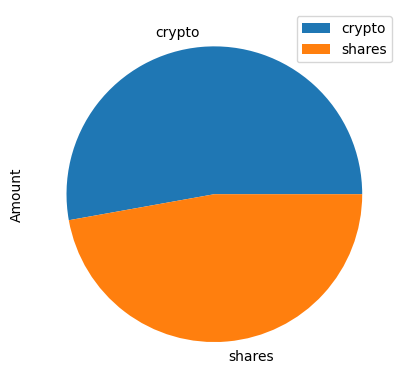

In [14]:
# Plot savings pie chart
df_savings.plot(kind="pie", subplots=True)

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())
difference = emergency_fund - total_savings

# Validate saving health

if total_savings > emergency_fund:
    print("Congratulations! you reach financial goal")
elif total_savings > emergency_fund:
    print("Congratulations! you have enough money in the fund")

else:
    print(f"You need {difference} to reach your financial goal")

You need 399.0 to reach your financial goal


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
timeframe = "1Day"
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-06-16', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-06-16', tz='America/New_York').isoformat()

In [17]:
# Get 5 years' worth of historical data for SPY and AGG
df_financial_ticker = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
# Reorganize the DataFrame
# Separate ticker data
AGG = df_financial_ticker[df_financial_ticker['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_financial_ticker[df_financial_ticker['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_financial_ticker = pd.concat([AGG,SPY ],axis=1, keys=["AGG","SPY"])

# Display sample data
df_financial_ticker.tail()

AGG                                               \
                            open    high      low  close   volume trade_count   
timestamp                                                                       
2023-06-12 04:00:00+00:00  98.09  98.160  97.7300  98.14  5436273       24139   
2023-06-13 04:00:00+00:00  98.48  98.480  97.6001  97.68  9568596       27973   
2023-06-14 04:00:00+00:00  97.88  97.990  97.4499  97.77  8360159       36242   
2023-06-15 04:00:00+00:00  98.29  98.460  98.1337  98.45  7471994       29262   
2023-06-16 04:00:00+00:00  98.09  98.275  97.9050  98.14  4599777       26718   

                                         SPY                            \
                                vwap    open      high     low   close   
timestamp                                                                
2023-06-12 04:00:00+00:00  97.959299  430.92  433.8800  430.17  433.80   
2023-06-13 04:00:00+00:00  97.819261  435.32  437.3300  434.63  436.66   
2023-06-14 04:00:00+00:00  97.793308  437.01  439.0612  433.59  437.18   
2023-06-15 04:00:00+00:00  98.355119  436.33  443.9000  436.23  442.60   
2023-06-16 04:00:00+00:00  98.118495  443.02  443.6078  438.97  439.46   

                                                              
                              volume trade_count        vwap  
timestamp                                                     
2023-06-12 04:00:00+00:00   76272808      523670  431.957032  
2023-06-13 04:00:00+00:00   95912772      673273  436.003879  
2023-06-14 04:00:00+00:00  100625477      712664  436.725442  
2023-06-15 04:00:00+00:00  110301302      748180  440.705812  
2023-06-16 04:00:00+00:00  110461387      619074  440.999282

In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500
weights = [0.8,0.2]
num_yrs = 30
MC_thirty_year = MCSimulation(
    portfolio_data = df_financial_ticker,
    weights= weights,
    num_simulation = num_sims,
    num_trading_days = 252*num_yrs)

In [19]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                      \
                             open      high     low    close   volume   
timestamp                                                               
2018-06-18 04:00:00+00:00  105.93  105.9300  105.80  105.900  2359452   
2018-06-19 04:00:00+00:00  106.05  106.1100  105.98  106.010  2184239   
2018-06-20 04:00:00+00:00  106.06  106.0600  105.79  105.805  2403650   
2018-06-21 04:00:00+00:00  105.88  105.9599  105.81  105.840  2896731   
2018-06-22 04:00:00+00:00  105.82  105.9400  105.80  105.940  1957177   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-06-18 04:00:00+00:00       10590  105.864382          NaN  275.49   
2018-06-19 04:00:00+00:00       10342  106.041881     0.001039  274.00   
2018-06-20 04:00:00+00:00        9220  105.886127    -0.001934  276.26   
2018-06-21 04:00:00+00:00       11286  105.870603     0.000331  275.96   
2018-06-22 04:00:00+00:00        7830  105.897826     0.000945  275.66   

                                                                          \
                              high     low   close    volume trade_count   
timestamp                                                                  
2018-06-18 04:00:00+00:00  276.700  274.95  276.59  53163695      221103   
2018-06-19 04:00:00+00:00  275.750  273.53  275.48  97669710      337433   
2018-06-20 04:00:00+00:00  276.720  275.59  276.01  54051558      212283   
2018-06-21 04:00:00+00:00  275.980  273.68  274.24  75659252      289344   
2018-06-22 04:00:00+00:00  275.785  274.49  274.76  58532014      231536   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-06-18 04:00:00+00:00  276.151288          NaN  
2018-06-19 04:00:00+00:00  274.931757    -0.004013  
2018-06-20 04:00:00+00:00  276.065730     0.001924  
2018-06-21 04:00:00+00:00  274.618337    -0.006413  
2018-06-22 04:00:00+00:00  275.099940     0.001896

In [20]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001150,0.999472,1.000668,1.007147,1.001057,0.997816,0.990094,0.995250,1.002716,0.999659,...,0.996535,1.005139,1.006089,0.996546,0.993423,1.002032,1.004687,1.003832,0.998380,0.994934
2,0.999040,1.005859,1.000850,1.009816,1.007372,0.988684,0.987550,0.996130,1.005447,1.001059,...,0.996614,1.006657,1.009471,0.996288,0.999827,1.002104,0.998263,1.000060,0.992754,0.988768
3,0.991189,1.005999,1.006655,1.011831,1.004502,0.990466,0.983032,0.995600,1.004259,0.989836,...,0.992385,1.006901,1.009281,0.998021,1.001662,1.001170,0.993472,0.997091,0.994230,0.985826
4,0.985064,1.005899,1.009110,1.011697,1.006679,0.985232,0.978831,0.987461,1.004751,0.986162,...,0.992195,0.996551,1.007720,0.992769,1.003157,1.006042,0.993508,1.003481,0.993449,0.981240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.530672,0.640029,2.370234,2.316502,2.796112,0.875291,0.889938,1.118970,1.538605,0.909048,...,1.904476,0.719182,0.887701,1.562307,0.910478,0.935497,2.370112,1.574989,3.248047,0.865011
7557,1.528763,0.643502,2.369799,2.319947,2.800089,0.877375,0.898607,1.116058,1.538621,0.903498,...,1.900555,0.715319,0.892625,1.569944,0.913926,0.935245,2.364439,1.569106,3.246202,0.865825
7558,1.531140,0.644206,2.374132,2.320184,2.808472,0.871221,0.903569,1.115834,1.529446,0.905623,...,1.889761,0.713676,0.889152,1.570406,0.908157,0.937869,2.360778,1.571806,3.241956,0.867713
7559,1.521159,0.647525,2.371992,2.316279,2.806977,0.868273,0.903145,1.110438,1.524151,0.907946,...,1.884878,0.707576,0.887563,1.572921,0.908732,0.937471,2.366219,1.573303,3.229960,0.867472


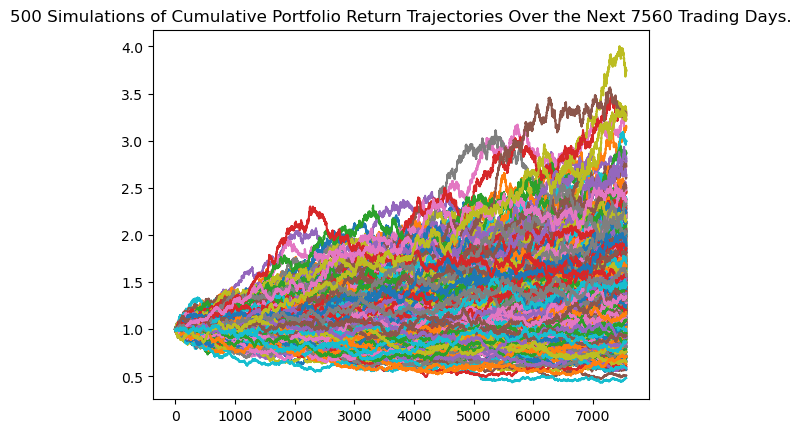

In [21]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

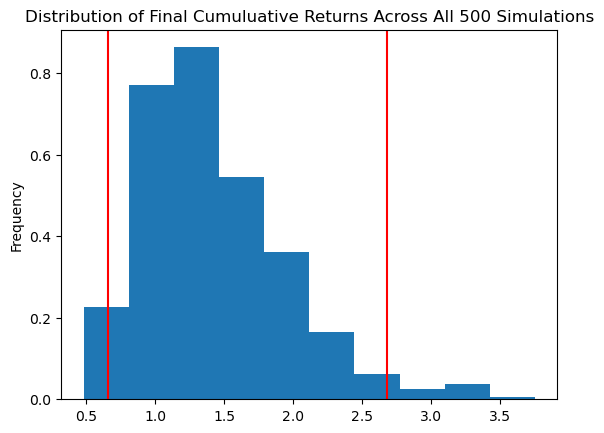

In [22]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
simulated_returns_data = {
    "mean": list(MC_thirty_year.simulated_return.mean(axis=1)),
    "median": list(MC_thirty_year.simulated_return.median(axis=1)),
    "min": list(MC_thirty_year.simulated_return.min(axis=1)),
    "max": list(MC_thirty_year.simulated_return.max(axis=1))
}

df_simulated_returns = pd.DataFrame(simulated_returns_data)
# Print summary statistics
df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,0.999969,1.000324,0.987741,1.012269
2,1.000211,1.000230,0.979298,1.018583
3,1.000072,1.000113,0.980790,1.021026
4,1.000032,0.999931,0.978207,1.019484


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000


tbl = MC_thirty_year.summarize_cumulative_return()
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $13106.4 and $53618.3


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [25]:
# Set initial investment
initial_investment_2 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment_2,2)
ci_upper = round(tbl[9]*initial_investment_2,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $19659.6 and $80427.45


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
num_sims = 500
weights = [0.8,0.2]
num_yrs = 5
MC_five_year = MCSimulation(
    portfolio_data = df_financial_ticker,
    weights= weights,
    num_simulation = num_sims,
    num_trading_days = 252*num_yrs)

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008968,1.002023,0.997242,1.006543,1.006586,1.004100,0.998326,1.002228,0.991885,1.002869,...,1.009329,1.003102,0.997987,0.994252,0.999152,0.995716,0.994248,1.004836,1.007754,0.997377
2,1.010199,0.994832,0.998979,1.006368,1.005753,0.997941,1.001485,1.001864,0.991713,1.001989,...,1.010761,1.000861,0.993675,0.989491,1.001221,0.997243,0.999278,1.006554,1.008873,0.995050
3,1.013951,0.991333,1.001273,1.007581,0.999725,1.002634,1.001508,1.000864,0.990237,0.999873,...,1.014990,0.996291,0.997569,0.991215,1.003985,0.998076,0.997130,1.012471,1.012940,0.995633
4,1.012094,0.980710,1.003652,1.012024,1.006417,0.999054,1.006256,0.999777,0.981610,0.998346,...,1.014486,1.000472,0.995738,0.991982,1.001947,1.000176,0.993188,1.014228,1.012093,1.001830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.118849,1.048808,1.315050,0.880873,1.115326,0.763033,1.081308,1.139169,1.083936,1.100156,...,0.938769,0.955144,0.935910,1.210949,1.163862,0.938418,1.205241,1.346415,1.147943,0.970809
1257,1.114421,1.049701,1.315161,0.880919,1.116027,0.759214,1.082061,1.138319,1.081217,1.098060,...,0.937302,0.951082,0.940529,1.220907,1.168403,0.941105,1.207638,1.342736,1.154904,0.967720
1258,1.115425,1.048882,1.306143,0.887391,1.120544,0.761496,1.083024,1.143879,1.081367,1.097048,...,0.929403,0.950650,0.935564,1.217294,1.165721,0.945863,1.205659,1.339070,1.156452,0.971517
1259,1.120177,1.044095,1.299111,0.884394,1.116911,0.759403,1.088287,1.144018,1.079557,1.100994,...,0.933918,0.948092,0.940034,1.214704,1.162743,0.944094,1.199981,1.334912,1.164400,0.963614


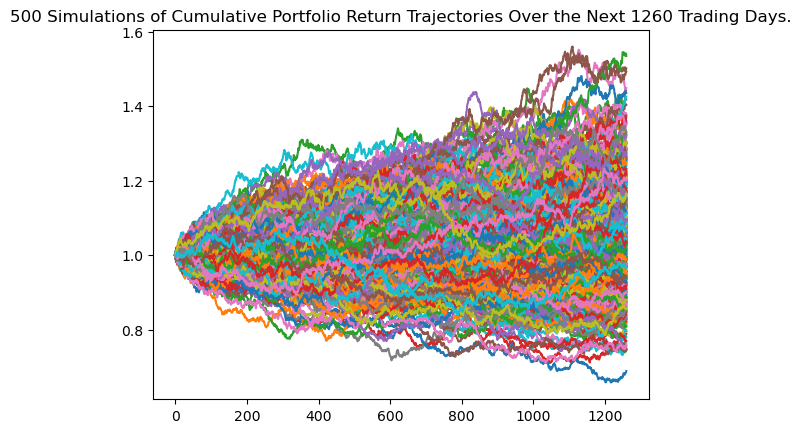

In [28]:
# Plot simulation outcomes
five_line_plot = MC_five_year.plot_simulation()

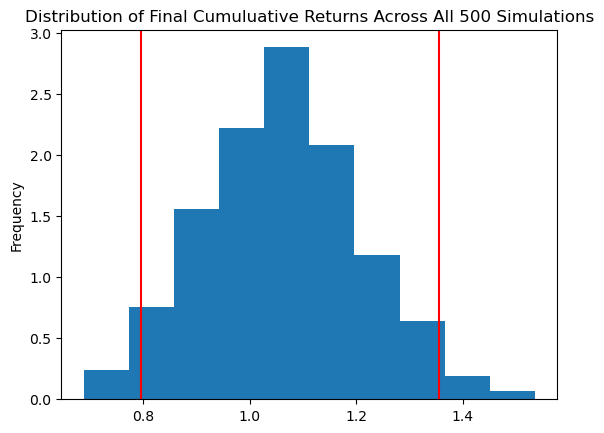

In [29]:
# Plot probability distribution and confidence intervals
five_dist_plot = MC_five_year.plot_distribution()

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
five_simulated_returns_data = {
    "mean": list(MC_five_year.simulated_return.mean(axis=1)),
    "median": list(MC_five_year.simulated_return.median(axis=1)),
    "min": list(MC_five_year.simulated_return.min(axis=1)),
    "max": list(MC_five_year.simulated_return.max(axis=1))
}

df_five_simulated_returns = pd.DataFrame(five_simulated_returns_data)

# Print summary statistics
df_five_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000326,1.000286,0.988937,1.010349
2,1.000628,1.000374,0.980921,1.016025
3,1.000513,1.000190,0.983704,1.020860
4,1.000362,1.000036,0.980210,1.020306


In [31]:
# Set initial investment
five_initial_investment = 60000

five_tbl = MC_five_year.summarize_cumulative_return()
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(five_tbl[8]*five_initial_investment,2)
ci_upper_five = round(five_tbl[9]*five_initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${five_initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $47704.98 and $81376.13


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
num_sims = 500
weights = [0.8,0.2]
num_yrs = 10
MC_ten_year = MCSimulation(
    portfolio_data = df_financial_ticker,
    weights= weights,
    num_simulation = num_sims,
    num_trading_days = 252*num_yrs)

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998787,0.999770,0.997523,0.994373,0.994373,0.995832,0.994525,1.001804,1.004078,1.005488,...,0.998352,1.002277,1.000149,1.005278,0.995875,0.997131,1.004578,1.005473,1.002846,1.001923
2,1.001060,1.004825,0.995630,0.990701,0.994612,0.992728,0.996049,0.998402,1.000544,1.004760,...,1.000240,0.999592,1.002475,1.006070,0.997257,0.997660,1.005945,1.011500,0.998447,1.005378
3,1.000344,1.005207,0.995067,0.988858,0.993328,0.986993,0.997018,0.999174,1.005049,1.004318,...,1.000544,0.999884,1.001285,1.003452,0.990273,1.001094,1.004532,1.009826,1.000034,1.006841
4,0.998742,1.002140,0.994062,0.991428,0.992076,0.988412,0.987678,0.998966,1.006362,1.000572,...,1.004614,0.993643,1.004922,1.000488,0.986135,1.005498,1.006971,1.008327,1.011147,1.007828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.211909,1.186106,0.977902,0.879215,0.672637,1.098743,1.802853,1.330135,1.133186,1.075453,...,0.870116,0.972772,0.800766,0.912464,1.267085,1.444711,1.020386,1.363918,0.928490,1.046950
2517,1.212281,1.182224,0.982741,0.882073,0.667088,1.103051,1.790510,1.336157,1.133648,1.062840,...,0.864554,0.971141,0.800804,0.912733,1.273631,1.446826,1.022302,1.362065,0.931268,1.045722
2518,1.225298,1.195323,0.985734,0.879165,0.667950,1.105946,1.792462,1.340051,1.140429,1.064122,...,0.859950,0.969660,0.797674,0.914626,1.274933,1.446912,1.018200,1.367262,0.929327,1.051906
2519,1.228448,1.197982,0.983179,0.879167,0.668166,1.113803,1.781654,1.342834,1.140911,1.059162,...,0.863293,0.967274,0.798457,0.912255,1.275996,1.455649,1.021449,1.359554,0.931407,1.061411


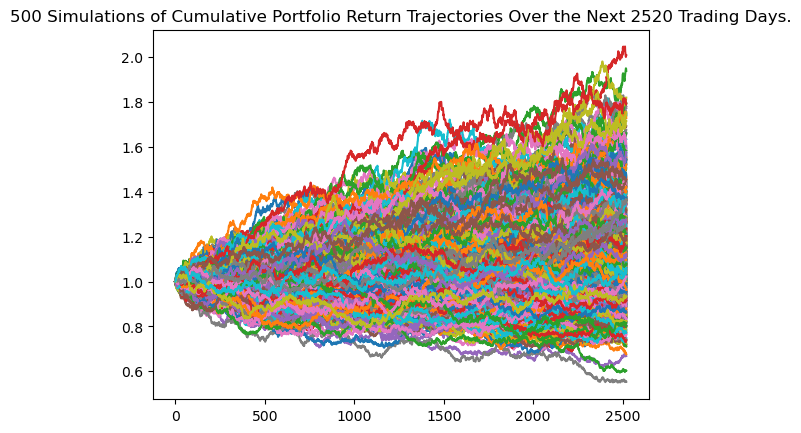

In [34]:
# Plot simulation outcomes
ten_line_plot = MC_ten_year.plot_simulation()

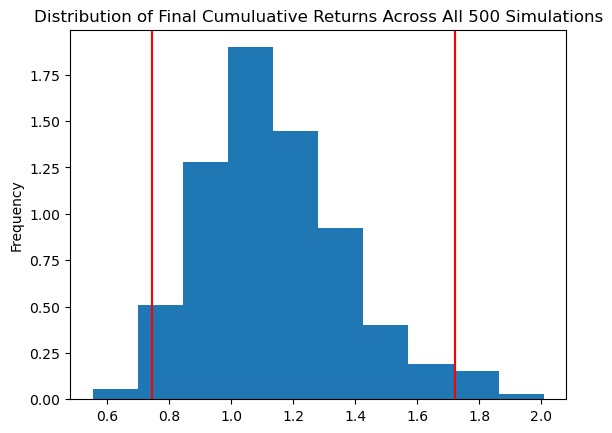

In [35]:
# Plot probability distribution and confidence intervals
ten_dist_plot = MC_ten_year.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_simulated_returns_data = {
    "mean": list(MC_ten_year.simulated_return.mean(axis=1)),
    "median": list(MC_ten_year.simulated_return.median(axis=1)),
    "min": list(MC_ten_year.simulated_return.min(axis=1)),
    "max": list(MC_ten_year.simulated_return.max(axis=1))
}

df_ten_simulated_returns = pd.DataFrame(ten_simulated_returns_data)

# Print summary statistics
df_ten_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000137,1.000140,0.987019,1.011781
2,1.000505,1.000435,0.980021,1.016514
3,1.000315,0.999989,0.980996,1.022766
4,1.000458,1.000500,0.976299,1.026693


In [37]:
# Set initial investment
ten_initial_investment = 60000

ten_tbl = MC_ten_year.summarize_cumulative_return()
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(ten_tbl[8]*ten_initial_investment,2)
ci_upper_ten = round(ten_tbl[9]*ten_initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $44763.32 and $103356.51
